<a href="https://colab.research.google.com/github/naomiburgess/QM2group15/blob/main/Chloropleth_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [88]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [89]:
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk9/london_wards.shp -o ./data/wk9/london_wards.shp
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk9/london_wards.cpg -o ./data/wk9/london_wards.cpg
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk9/london_wards.dbf -o ./data/wk9/london_wards.dbf
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk9/london_wards.prj -o ./data/wk9/london_wards.prj
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk9/london_wards.shx -o ./data/wk9/london_wards.shx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file ./data/wk9/london_wards.shp: No such file 
  0 2532k    0 16384    0     0   142k      0  0:00:17 --:--:--  0:00:17  142k
curl: (23) Failed writing body (0 != 16384)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: Failed to create the file ./data/wk9/london_wards.cpg: No such file 
100    10  100    10    0     0    140      0 --:--:-- --:--:-- --:--:--   140
curl: (23) Failed writing body (0 != 10)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   

In [90]:
#Install the geopandas module
!pip install geopandas

#Uninstall any existing version; forcing Yes
!pip uninstall --yes pysal

#Install newest branch
!pip install pysal == 2.0.0

Uninstalling pysal-2.3.0:
  Successfully uninstalled pysal-2.3.0
ERROR: Invalid requirement: '=='


In [91]:
!pip install pysal
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

Processing /root/.cache/pip/wheels/ec/51/8f/4fd7e7088448f99c3a26c2cf434b60ba18b6fef695dd72f439/pysal-2.3.0-cp36-none-any.whl


In [92]:

data_path = "London_Ward.shp"

# londonWards = gp.GeoDataFrame.from_file(data_path)

londonWards = gp.read_file(data_path)

londonWards.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


In [93]:
londonWards.crs


<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [94]:
londonWards['geometry'].head()

0    POLYGON ((516401.600 160201.800, 516407.300 16...
1    POLYGON ((517829.600 165447.100, 517837.100 16...
2    POLYGON ((518107.500 167303.400, 518114.300 16...
3    POLYGON ((520480.000 166909.800, 520490.700 16...
4    POLYGON ((522071.000 168144.900, 522063.900 16...
Name: geometry, dtype: geometry

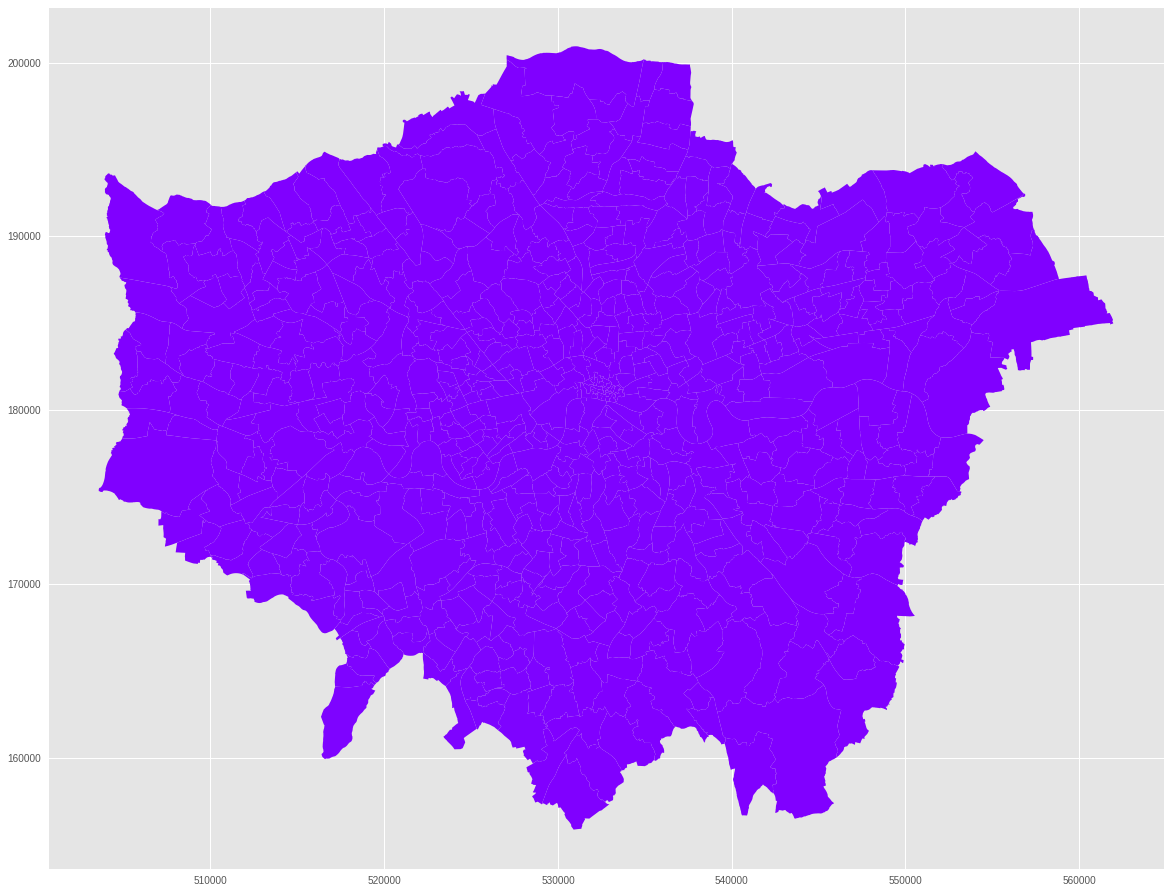

In [95]:
!pip install mapclassify
import mapclassify
londonWards.plot(column='GSS_CODE', cmap='rainbow', scheme='quantiles')

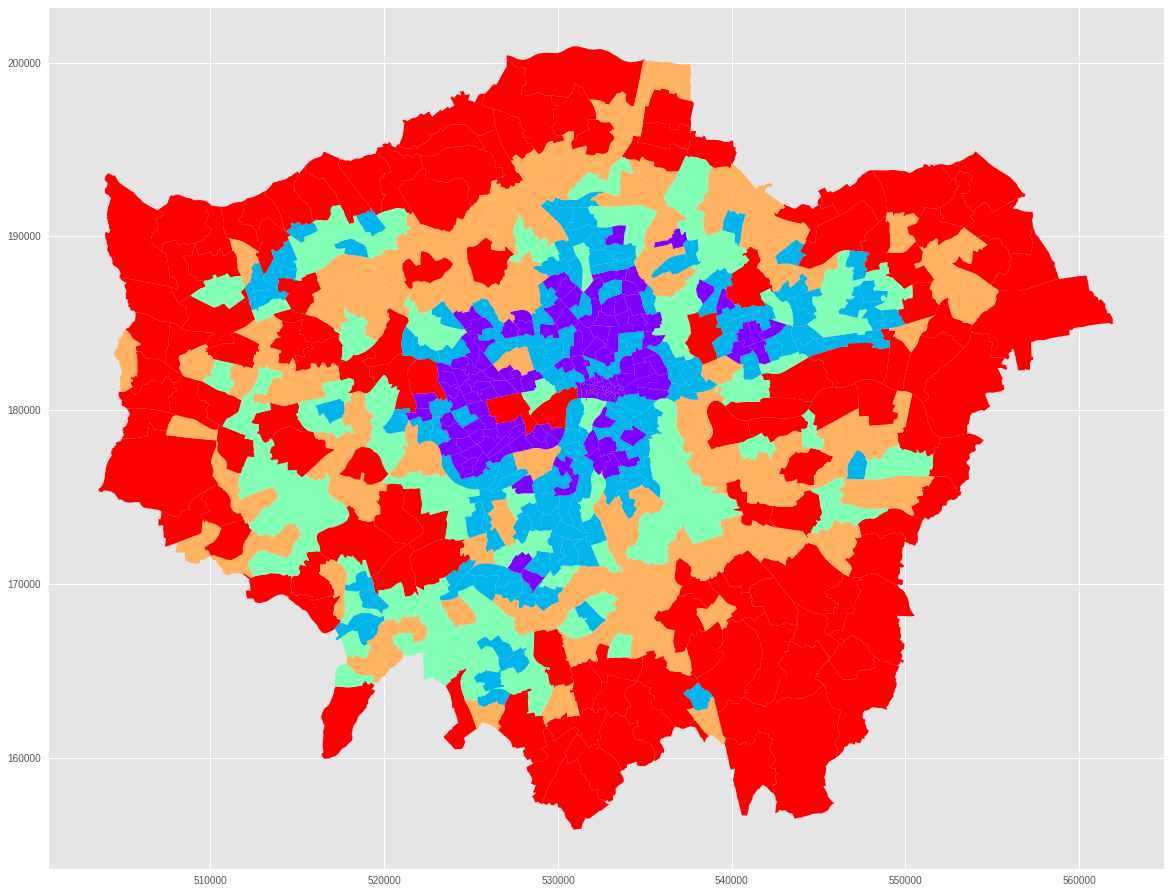

In [96]:
!pip install mapclassify
import mapclassify
londonWards.plot(column='HECTARES', cmap='rainbow', scheme='quantiles')

In [97]:
data_path = "Source1.csv"

persons = pd.read_csv(data_path, encoding = 'latin1')
persons.head()

,Unnamed: 0,Ward name,Area - Square Kilometres,Population - 2015,Working-age (16-64) - 2015,Employment rate (16-64) - 2011,Median Household income estimate (2012/13),Average Public Transport Accessibility score - 2014
0,103,Camden - Belsize,0.8,12800.0,8850.0,74.4,52680.0,4.2
1,104,Camden - Bloomsbury,1.0,11700.0,9800.0,51.4,40340.0,8.0
2,105,Camden - Camden Town with Primrose Hill,1.2,13100.0,9550.0,69.4,45840.0,5.4
3,106,Camden - Cantelowes,0.8,12450.0,9450.0,64.3,39060.0,4.9
4,107,Camden - Fortune Green,1.0,12100.0,9000.0,74.6,46800.0,4.8


In [98]:
persons.replace(',', '', regex=True, inplace=True)
persons['Population - 2015'] = persons['Population - 2015'].replace('-', 'NaN', regex=True).astype('float')
persons['Population - 2015'].head()

0    12800.0
1    11700.0
2    13100.0
3    12450.0
4    12100.0
Name: Population - 2015, dtype: float64

In [99]:
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Kingston upon Thames'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Croydon'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'City of London'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Bromley'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Barking and Dagenham'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'City of Westminster'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Hounslow'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Newham'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Hackney'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Islington'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Ealing'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Haringey'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Havering'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Tower Hamlets'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Hillingdon'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Harrow'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Brent'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Barnet'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Lambeth'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Southwark'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Lewisham'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Greenwich'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Bexley'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Enfield'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Waltham Forest'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Redbridge'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Sutton'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Richmond upon Thames'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Merton'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Wandsworth'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Hammersmith and Fulham'], inplace = True)
londonWards.drop(londonWards.index[londonWards['BOROUGH'] == 'Westminster'], inplace = True)

londonWards

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
460,Cremorne,E05000387,61.028,13.241,E09000020,Kensington and Chelsea,51243,"POLYGON ((526027.600 177216.200, 526067.100 17..."
461,Holland,E05000391,103.896,0.000,E09000020,Kensington and Chelsea,50661,"POLYGON ((525426.700 179502.900, 525404.600 17..."
462,Norland,E05000392,72.393,0.000,E09000020,Kensington and Chelsea,117492,"POLYGON ((523600.100 180701.400, 523604.600 18..."
463,Golborne,E05000389,94.413,0.000,E09000020,Kensington and Chelsea,50559,"POLYGON ((524230.900 181514.300, 524193.200 18..."
464,Redcliffe,E05000396,69.640,0.000,E09000020,Kensington and Chelsea,51247,"POLYGON ((525674.800 178424.600, 525683.100 17..."
465,Stanley,E05000399,66.235,0.000,E09000020,Kensington and Chelsea,117490,"POLYGON ((526523.200 178032.900, 526685.800 17..."
466,Royal Hospital,E05000397,90.143,12.753,E09000020,Kensington and Chelsea,117491,"POLYGON ((527496.500 178268.400, 527559.800 17..."
467,Brompton,E05000383,95.504,0.000,E09000020,Kensington and Chelsea,117493,"POLYGON ((526757.200 178291.800, 526667.200 17..."
468,Abingdon,E05000382,63.060,0.000,E09000020,Kensington and Chelsea,50660,"POLYGON ((525669.000 178860.700, 525604.000 17..."
469,Pembridge,E05000394,48.904,0.000,E09000020,Kensington and Chelsea,50562,"POLYGON ((524551.300 180815.200, 524554.000 18..."


In [100]:
londonWards.sort_values(by=["BOROUGH", "NAME"], inplace = True)
londonWards = londonWards.reset_index()
del londonWards['index']
londonWards

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Belsize,E05000128,78.057,0.000,E09000007,Camden,50576,"POLYGON ((527541.800 184205.300, 527538.000 18..."
1,Bloomsbury,E05000129,102.091,0.000,E09000007,Camden,117296,"POLYGON ((528891.100 182192.600, 528900.900 18..."
2,Camden Town with Primrose Hill,E05000130,116.615,0.000,E09000007,Camden,117297,"POLYGON ((527676.900 183645.500, 527681.000 18..."
3,Cantelowes,E05000131,75.933,0.000,E09000007,Camden,117299,"POLYGON ((530121.000 184134.200, 530065.000 18..."
4,Fortune Green,E05000132,100.652,0.000,E09000007,Camden,117295,"POLYGON ((524651.100 184647.000, 524612.500 18..."
5,Frognal and Fitzjohns,E05000133,153.023,0.000,E09000007,Camden,117293,"POLYGON ((525534.300 186427.800, 525556.300 18..."
6,Gospel Oak,E05000134,69.232,0.000,E09000007,Camden,117291,"POLYGON ((528480.500 185441.400, 528489.700 18..."
7,Hampstead Town,E05000135,244.939,0.000,E09000007,Camden,117294,"POLYGON ((526902.100 185000.200, 526863.500 18..."
8,Haverstock,E05000136,73.177,0.000,E09000007,Camden,117298,"POLYGON ((527679.500 184261.400, 527671.500 18..."
9,Highgate,E05000137,323.926,0.000,E09000007,Camden,50573,"POLYGON ((526683.200 187383.700, 526684.400 18..."


In [101]:
df_joined = londonWards.merge(persons, left_index=True, right_index=True)
df_joined

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,Unnamed: 0,Ward name,Area - Square Kilometres,Population - 2015,Working-age (16-64) - 2015,Employment rate (16-64) - 2011,Median Household income estimate (2012/13),Average Public Transport Accessibility score - 2014
0,Belsize,E05000128,78.057,0.000,E09000007,Camden,50576,"POLYGON ((527541.800 184205.300, 527538.000 18...",103,Camden - Belsize,0.8,12800.0,8850.0,74.4,52680.0,4.2
1,Bloomsbury,E05000129,102.091,0.000,E09000007,Camden,117296,"POLYGON ((528891.100 182192.600, 528900.900 18...",104,Camden - Bloomsbury,1.0,11700.0,9800.0,51.4,40340.0,8.0
2,Camden Town with Primrose Hill,E05000130,116.615,0.000,E09000007,Camden,117297,"POLYGON ((527676.900 183645.500, 527681.000 18...",105,Camden - Camden Town with Primrose Hill,1.2,13100.0,9550.0,69.4,45840.0,5.4
3,Cantelowes,E05000131,75.933,0.000,E09000007,Camden,117299,"POLYGON ((530121.000 184134.200, 530065.000 18...",106,Camden - Cantelowes,0.8,12450.0,9450.0,64.3,39060.0,4.9
4,Fortune Green,E05000132,100.652,0.000,E09000007,Camden,117295,"POLYGON ((524651.100 184647.000, 524612.500 18...",107,Camden - Fortune Green,1.0,12100.0,9000.0,74.6,46800.0,4.8
5,Frognal and Fitzjohns,E05000133,153.023,0.000,E09000007,Camden,117293,"POLYGON ((525534.300 186427.800, 525556.300 18...",108,Camden - Frognal and Fitzjohns,1.5,12250.0,8500.0,69.8,60310.0,4.8
6,Gospel Oak,E05000134,69.232,0.000,E09000007,Camden,117291,"POLYGON ((528480.500 185441.400, 528489.700 18...",109,Camden - Gospel Oak,0.7,11500.0,7950.0,65.5,39990.0,4.1
7,Hampstead Town,E05000135,244.939,0.000,E09000007,Camden,117294,"POLYGON ((526902.100 185000.200, 526863.500 18...",110,Camden - Hampstead Town,2.5,11400.0,7550.0,76.6,62840.0,4.0
8,Haverstock,E05000136,73.177,0.000,E09000007,Camden,117298,"POLYGON ((527679.500 184261.400, 527671.500 18...",111,Camden - Haverstock,0.7,12750.0,8900.0,62.9,35730.0,4.7
9,Highgate,E05000137,323.926,0.000,E09000007,Camden,50573,"POLYGON ((526683.200 187383.700, 526684.400 18...",112,Camden - Highgate,3.2,11150.0,7500.0,70.4,47840.0,3.9


In [102]:
type(df_joined)

geopandas.geodataframe.GeoDataFrame

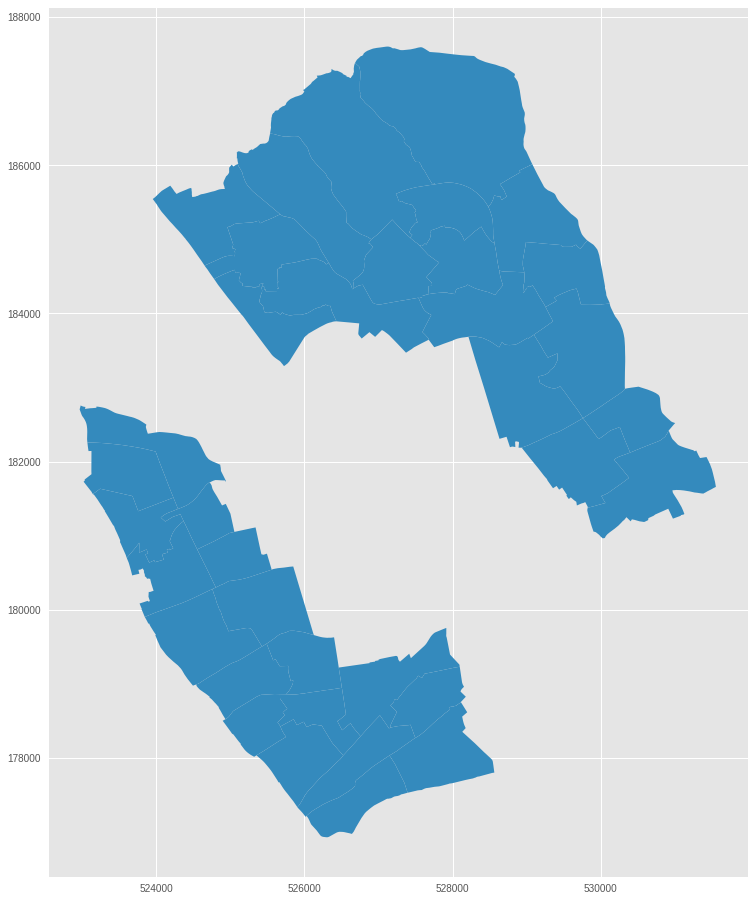

In [103]:
df_joined.plot()

In [131]:
crime_data = "Source8.csv"
crime = pd.read_csv(crime_data)

In [132]:

from shapely.geometry import Point
crime["geometry"] = crime.apply(lambda x:Point(x["Longitude"], x["Latitude"]), axis=1)
crime = gp.GeoDataFrame(crime)

In [133]:
crime = crime.set_crs(epsg=4326)

In [134]:
crime = crime.to_crs("EPSG:27700")

In [135]:
crime.head()

,Unnamed: 0,Month,Longitude,Latitude,Location,LSOA name,Crime type,geometry
0,0,2017-12,-0.143286,51.563776,On or near Chester Road,Camden 001B,Bicycle theft,POINT (528794.987 186621.961)
1,1,2017-12,-0.143286,51.563776,On or near Chester Road,Camden 001B,Other theft,POINT (528794.987 186621.961)
2,2,2017-12,-0.147903,51.563058,On or near Bromwich Avenue,Camden 001B,Theft from the person,POINT (528477.006 186534.002)
3,3,2017-12,-0.150701,51.562374,On or near St Anne'S Close,Camden 001C,Other theft,POINT (528284.998 186453.030)
4,4,2017-12,-0.150701,51.562374,On or near St Anne'S Close,Camden 001C,Theft from the person,POINT (528284.998 186453.030)


In [136]:
type(crime)

geopandas.geodataframe.GeoDataFrame

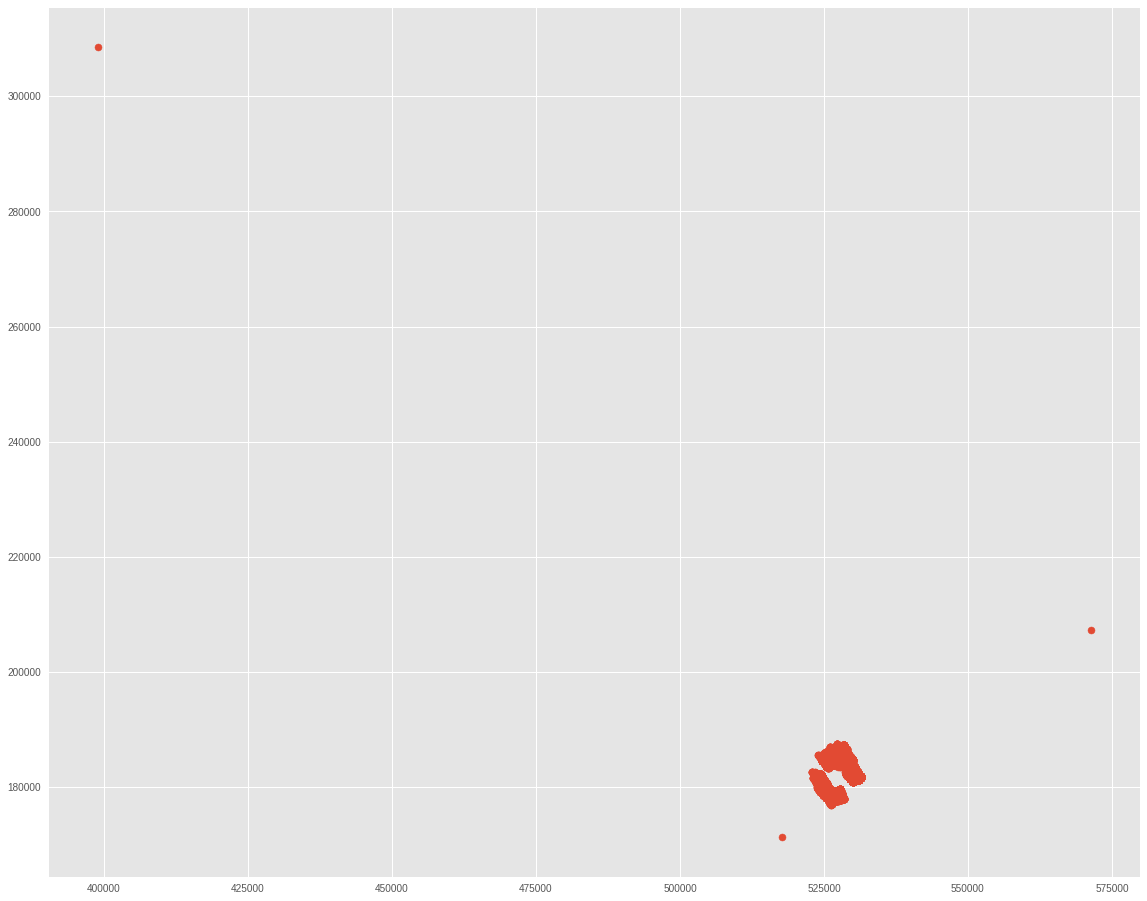

In [137]:
crime.plot()

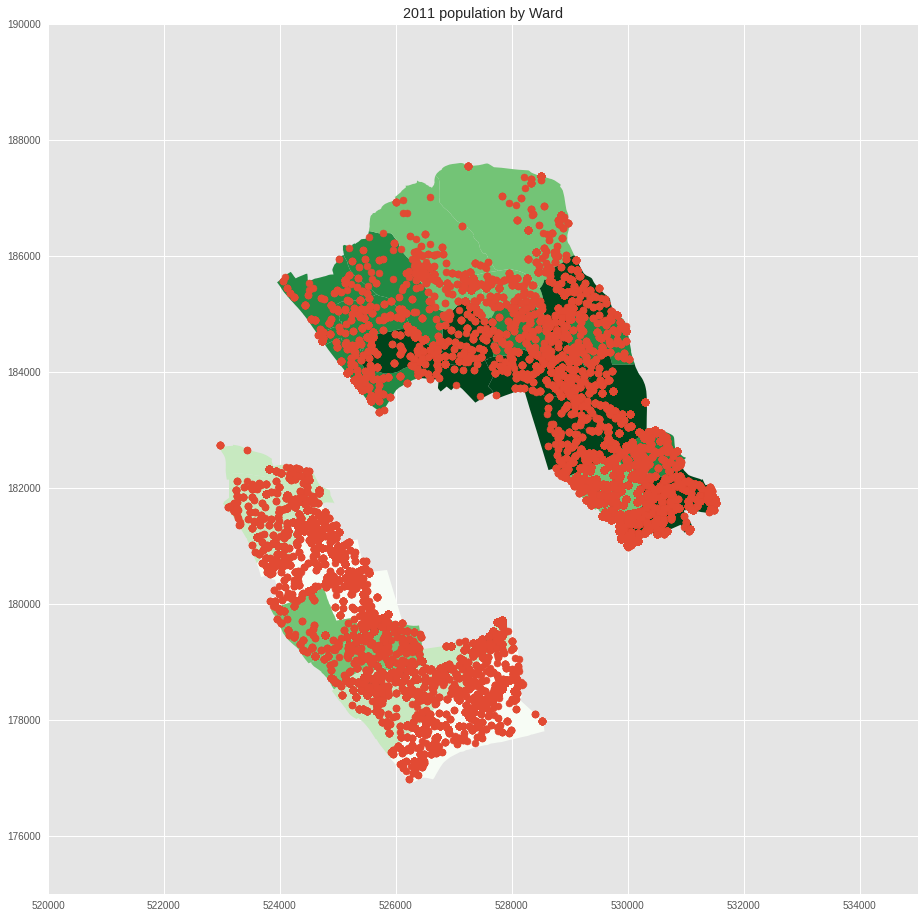

In [141]:
ax = df_joined.plot(column='Population - 2015', cmap='Greens', scheme='quantiles', k=5)
plt.title('2011 population by Ward')
plt.xlim(520000,535000)
plt.ylim(175000,190000)

crime.plot(ax=ax)